In [ ]:
import pandas as pd
sheet_id = '1od_wk6OCfLKbH1VLG-AotgJaNgBuU4iTDyJlKtCi-kk'
dispatch_sheet_name = 'raw'
urlDBHTFD = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={dispatch_sheet_name}"

#========
df = pd.read_csv(urlDBHTFD)

In [ ]:
xlist = df['DBH_mm'].to_list()
ylist = df['TFD_mm'].to_list()

#RMSE

In [ ]:
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# input data
y = np.array(ylist)
x = np.array(xlist)

# scipy linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
y_pred = intercept + slope * x

mse = mean_squared_error(y_true=y, y_pred=y_pred)
rmse = mse**0.5

print('scipy intercept: {:.6f}'.format(intercept))
print('scipy slope: {:.6f}'.format(slope))
print('scipy MSE: {:.6f}'.format(mse))
print('scipy RMSE: {:.6f}'.format(rmse))
# scipy intercept: 45.058333
# scipy slope: 3.812608
# scipy MSE: 49.793366
# scipy RMSE: 7.056441

# sklearn linear regression
reg = LinearRegression().fit(x.reshape(- 1, 1), y)
y_pred = reg.predict(x.reshape(- 1, 1))

mse = mean_squared_error(y_true=y, y_pred=y_pred)
rmse = mse**0.5

print('sklearn intercept: {:.6f}'.format(reg.intercept_))
print('sklearn slope: {:.6f}'.format(reg.coef_[0]))
print('sklearn MSE: {:.6f}'.format(mse))
print('sklearn RMSE: {:.6f}'.format(rmse))
# sklearn intercept: 45.058333
# sklearn slope: 3.812608
# sklearn MSE: 49.793366
# sklearn RMSE: 7.056441

scipy intercept: 104.435235
scipy slope: 1.105063
scipy MSE: 2921.928073
scipy RMSE: 54.054862
sklearn intercept: 104.435235
sklearn slope: 1.105063
sklearn MSE: 2921.928073
sklearn RMSE: 54.054862


#Logisitic regression

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dfx= df[df['Species_Code']==3]
print(dfx.columns.to_list)

"""
['V1', 'fid', 'Date', 'Location', 'Species_Code', 'SGR_Code', 'DBH_mm',
       'TFD_mm', 'Height_m', 'TrunkFlareType_Code', 'LeanFromVertical',
       'PresenceOfProtrudingRoot', 'ProtrudePartReachExcessBoarder_Code',
       'LengthOfOutmostProtrudingPartsReachExcessBoarder_mm',
       'LengthOfOutmostRootAboveSoilNonReachingBoarder_mm', 'PlanterWidth_m',
       'PresenceHardwareDamage', 'HardwareDamageType_Code', 'SoilCover_Code',
       'ShortestDistanceOfTrunkFromHardware_mm', 'TreeNearEdge_Code',
       'Remarks1', 'Remarks2', 'Remarks3', 'X', 'Y', 'COO_1', 'CooksOutlier_1',
       'LN_TFD', 'LN_DBH', 'COO_LN_2', 'CooksOutlier_LN_2']
"""

<bound method IndexOpsMixin.tolist of Index(['V1', 'fid', 'Date', 'Location', 'Species_Code', 'SGR_Code', 'DBH_mm',
       'TFD_mm', 'Height_m', 'TrunkFlareType_Code', 'LeanFromVertical',
       'PresenceOfProtrudingRoot', 'ProtrudePartReachExcessBoarder_Code',
       'LengthOfOutmostProtrudingPartsReachExcessBoarder_mm',
       'LengthOfOutmostRootAboveSoilNonReachingBoarder_mm', 'PlanterWidth_m',
       'PresenceHardwareDamage', 'HardwareDamageType_Code', 'SoilCover_Code',
       'ShortestDistanceOfTrunkFromHardware_mm', 'TreeNearEdge_Code',
       'Remarks1', 'Remarks2', 'Remarks3', 'X', 'Y', 'COO_1', 'CooksOutlier_1',
       'LN_TFD', 'LN_DBH', 'COO_LN_2', 'CooksOutlier_LN_2'],
      dtype='object')>


"\n['V1', 'fid', 'Date', 'Location', 'Species_Code', 'SGR_Code', 'DBH_mm',\n       'TFD_mm', 'Height_m', 'TrunkFlareType_Code', 'LeanFromVertical',\n       'PresenceOfProtrudingRoot', 'ProtrudePartReachExcessBoarder_Code',\n       'LengthOfOutmostProtrudingPartsReachExcessBoarder_mm',\n       'LengthOfOutmostRootAboveSoilNonReachingBoarder_mm', 'PlanterWidth_m',\n       'PresenceHardwareDamage', 'HardwareDamageType_Code', 'SoilCover_Code',\n       'ShortestDistanceOfTrunkFromHardware_mm', 'TreeNearEdge_Code',\n       'Remarks1', 'Remarks2', 'Remarks3', 'X', 'Y', 'COO_1', 'CooksOutlier_1',\n       'LN_TFD', 'LN_DBH', 'COO_LN_2', 'CooksOutlier_LN_2']\n"

<ipython-input-40-e85df8e9f38b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




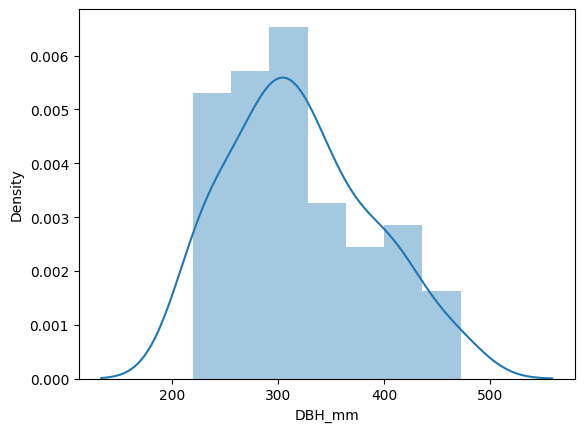

[0 1]


<ipython-input-40-e85df8e9f38b>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-40-e85df8e9f38b>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning:



`distplot` is a deprecated function and will be removed in 

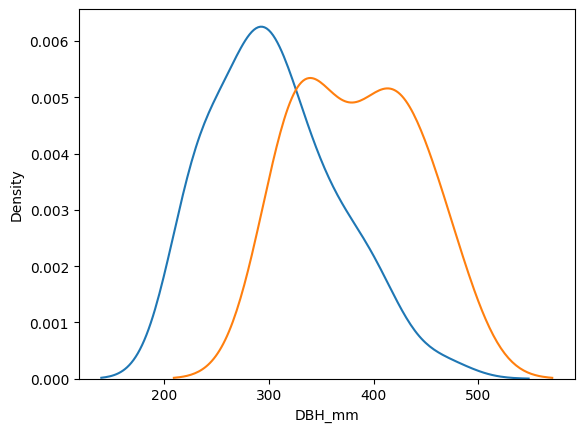

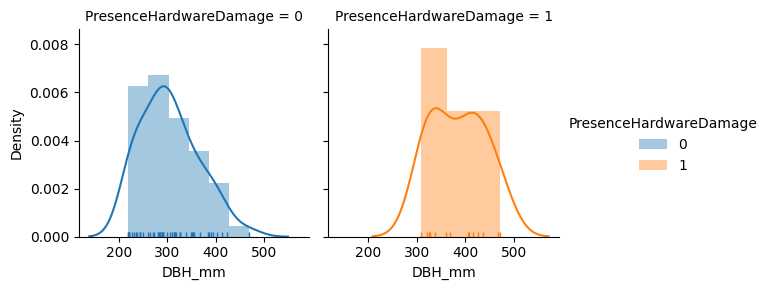

In [ ]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.distplot(dfx['DBH_mm'])

# Show the plot
plt.show()

print(dfx['PresenceHardwareDamage'].unique())

for x in dfx['PresenceHardwareDamage'].unique():
    values = dfx.DBH_mm[dfx['PresenceHardwareDamage'] == x]
    sns.distplot(values, hist=False, rug=False)

g = sns.FacetGrid(dfx, col='PresenceHardwareDamage', hue='PresenceHardwareDamage')
p1 = g.map(sns.distplot, 'DBH_mm', hist=True, rug=True).add_legend()

##visualizating logistic model

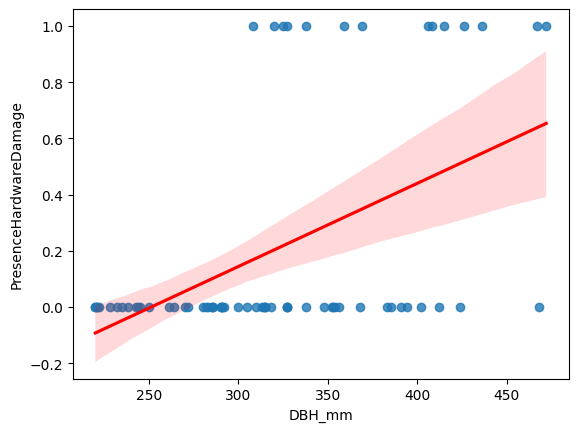

In [ ]:
# Draw a linear regression trend line and a scatter plot of DBH_mm vs. PresenceHardwareDamage
sns.regplot(data = dfx, x='DBH_mm',y='PresenceHardwareDamage',
            line_kws={"color": "red"})

# Show the plot
plt.show()

In [ ]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs.
# length of relationship using the churn dataset
mdl_Damage_vs_relationship = logit('PresenceHardwareDamage~DBH_mm', data=dfx).fit()

# Print the parameters of the fitted model
print(mdl_Damage_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.385701
         Iterations 7
Intercept   -8.532263
DBH_mm       0.020909
dtype: float64


In [ ]:
explanatory_data = pd.DataFrame({'DBH_mm': np.arange(-1, .11, .5)})

# Create prediction_data
prediction_data = explanatory_data.assign(
  PresenceHardwareDamage = mdl_Damage_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

   DBH_mm  PresenceHardwareDamage
0    -1.0                0.000193
1    -0.5                0.000195
2     0.0                0.000197


,DBH_mm


#3d dbh tfd planter

In [ ]:
dfx= df[df['Species_Code']==3]

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='PlanterWidth_m', y='TFD_mm', z='DBH_mm',
              color='Species_Code', opacity=0.6, size_max = 12)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
fig.write_html("/content/3dplot.html")